In [1]:

import os
import numpy as np
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture 
from skimage import io, color

In [2]:
path = r"D:\skripsi\DataCoba\UCF11_greyscale"

kelas = os.listdir(path)
print("Daftar kelas = ",kelas,"\n\nBanyak kelas = ", len(kelas))

Daftar kelas =  ['basketball-greyscale', 'biking-greyscale', 'diving-greyscale', 'golf_swing-greyscale', 'horse_riding-greyscale', 'soccer_juggling-greyscale', 'swing-greyscale', 'tennis_swing-greyscale', 'trampoline_jumping-greyscale', 'vollyball_spiking-greyscale', 'walking-greyscale'] 

Banyak kelas =  11


In [4]:
def segmentasiGMM(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)

    # Reshape the grayscale image to a 1D array
    pixels = gray_image.ravel()

    # Apply Gaussian Mixture Model (GMM) for segmentation
    n_components = 2  # Number of components (clusters)
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(pixels.reshape(-1, 1))
    segmented = gmm.predict(pixels.reshape(-1, 1))

    # Reshape the segmented labels back to the shape of the original image
    segmented_image = segmented.reshape(gray_image.shape)

    # Assign colors to clusters
    # Cluster 1 will be white, and Cluster 0 will be black
    segmented_image = np.where(segmented_image == 0, 1, 0)
    return(segmented_image)


(224, 224, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
(224, 224)


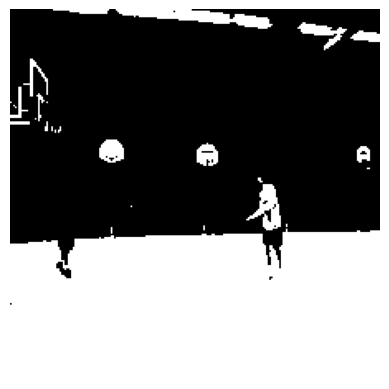

In [5]:
img = cv2.imread(r"D:\skripsi\DataCoba\UCF11_greyscale\basketball-greyscale\framebasketball_1_1.png")
print (img.shape)
img = segmentasiGMM(img)
img = img.astype(np.uint8)
a = PIL.Image.fromarray(img)
plt.axis('off')
# plt.imshow(img)
plt.imshow(a, cmap='gray')
# print(a)
plt.savefig("GMM.jpg", bbox_inches='tight', pad_inches=0)
print(img)
print (img.shape)


In [ ]:
import os 

folder_path = r"D:\skripsi\Data\UCF11_grayscale\basketball-grayscale"
output_path = r"D:\skripsi\Data\UCF11_GMM\basketball-GMM"
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        img = cv2.imread(file_path)
        img = segmentasiGMM(img)
        img = img.astype(np.uint8)
        a = PIL.Image.fromarray(img)
        plt.axis('off')
        file_name = os.path.basename(file_path)
        save_path = output_path + file_name + '-GMM.png'  # ubah lokasi penyimpanan sesuai kebutuhan
        plt.imshow(a, cmap='gray')
        plt.savefig(save_path , bbox_inches='tight', pad_inches=0)
        plt.show()
        print(file_path)
